In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/bye3/.local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display', 'power']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
import glob
from radarpack import radarbeam
jro0 = radarbeam.radarspecs(location="JRO")
from IPython import display

In [3]:
#VALLEY ISR data files and experiment parameters are set --- thx to Lin Le 

valleyfolder = "/raid/home/linle2/16_Valley_spectra/valley7/spectra_d2016014/proc2"
datafiles = glob.glob1(valleyfolder+'/','*.npy') 
datafiles.sort()

valleytime = []
valleyname = []
for filename in datafiles:
    fullname = valleyfolder+'/'+filename
    data=load(fullname,allow_pickle=True)[()]
    filetime=data['timearray']
    lt = filetime.tm_hour+filetime.tm_min/60.0+filetime.tm_sec/3600.0
    valleytime += [lt]
    valleyname += [fullname]
valleytime = array(valleytime)
valleyname = array(valleyname)

valleytx = 0.037109375; valleyty = -0.037109375
H_LOW = 130e3
H_HIGH = 420e3
P_ORDER = 5

In [4]:
vipirfolder = '/raid/VIPIR/vipir2016/014/raw/'
vipirfile = 'JM91J_2016014204337.RIQ'

/raid/VIPIR/vipir2016/014/raw/JM91J_2016014204337.RIQ


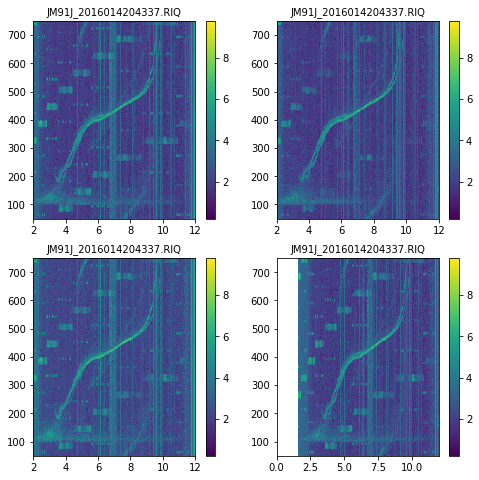

In [8]:
# producing the VIPIRgrams from VIPIR *.RIQ files --- thx to Erhan + Pablo

# data type definition
iq_t = dtype([('I','>i2'),('Q','>i2')])
# header type definitions
sct_t = dtype([('magic','<u4'),('sounding_table_size','<u4'), ('pulse_table_size','<u4'), ('raw_data_size','<u4'), 
    ('struct_version','<f4'),('start_year','<u4'), ('start_daynumber','<u4'), ('start_month','<u4'), ('start_day','<u4'), 
    ('start_hour','<u4'), ('start_minute','<u4'), ('start_second','<u4'), ('start_epoch','<u4'), 
    ('readme','128<int8'), ('decimation_method','<u4'), ('decimation_threshold','<f4'), ('user','128<int8')])
station_t = dtype([('file_id','64<int8'), 
    ('ursi','8<int8'), ('rx_name','32<int8'), ('rx_latitude','<f4'), ('rx_longitude','<f4'), ('rx_altitude','<f4'), 
    ('rx_count','<u4'), ('rx_antenna_type','(32,32)<int8'), ('rx_position','(32,3)<f4'), ('rx_direction','(32,3)<f4'), 
    ('rx_height','32<f4'), ('rx_cable_length','32<f4'), ('frontend_atten','<f4'), ('tx_name','32<int8'), ('tx_latitude','<f4'), 
    ('tx_longitude','<f4'), ('tx_altitude','<f4'), ('tx_antenna_type','32<int8'), ('tx_vector','3<f4'), ('tx_height','<f4'), 
    ('tx_cable_length','<f4'), ('drive_band_count','<u4'), ('drive_band_bounds','(64,2)<f4'), ('drive_band_atten','64<f4'), 
    ('rf_control','<u4'), ('ref_type','32<int8'), ('clock_type','32<int8'), ('user','128<int8')])	
timing_t = dtype([ ('file_id','64<int8'), 
    ('pri','<f4'), ('pri_count','<u4'), ('ionogram_count','<u4'), ('holdoff','<f4'), ('range_gate_offset','<f4'), 
    ('gate_count','<u4'), ('gate_start','<f4'), ('gate_end','<f4'), ('gate_step','<f4'), ('data_start','<f4'), ('data_width','<f4'), 
    ('data_baud_count','<u4'), ('data_wave_file','64<int8'), ('data_baud','(1024,2)<f4'), ('data_pairs','<u4'), ('cal_start','<f4'), 
    ('cal_width','<f4'), ('cal_baud_count','<u4'), ('cal_wave_file','64<int8'), ('cal_baud','(1024,2)<f4'), ('cal_pairs','<u4'), 
    ('user','128<int8')])
frequency_t = dtype([('file_id','64<int8'), 
    ('base_start','<f4'), ('base_end','<f4'), ('base_steps','<u4'), ('tune_type','<u4'), 
    ('base_table','8192<f4'), ('linear_step','<f4'), ('log_step','<f4'), ('freq_table_id','64<int8'), ('tune_steps','<u4'), 
    ('pulse_count','<u4'), ('pulse_pattern','256<u4'), ('pulse_offset','<f4'), ('ramp_steps','<u4'), 
    ('ramp_repeats','<u4'), ('drive_table','8192<f4'), ('user','128<int8')])
receiver_t = dtype([('file_id','64<int8'), 
    ('rx_chan','<u4'), ('rx_map','16<u4'), ('word_format','<u4'), ('cic2_dec','<u4'), ('cic2_interp','<u4'), 
    ('cic2_scale','<u4'), ('cic5_dec','<u4'), ('cic5_scale','<u4'), ('rcf_type','32<int8'), ('rcf_dec','<u4'), ('rcf_taps','<u4'), 
    ('coefficients','160<u4'), ('analog_delay','<f4'), ('user','128<int8')])
exciter_t = dtype([('file_id','64<int8'), 
    ('cic_scale','<u4'), ('cic2_dec','<u4'), ('cic2_interp','<u4'), ('cic5_interp','<u4'), 
    ('rcf_type','32<int8'), ('rcf_taps','<u4'), ('rcf_taps_phase','<u4'), ('coefficients','256<u4'), ('analog_delay','<f4'), 
    ('user','128<int8')])
monitor_t = dtype([
    ('balun_currents','8<u4'), ('balun_status','8<u4'), ('front_end_status','8<u4'), ('receiver_status','8<u4'), 
    ('exciter_status','2<u4'), ('user','512<int8')])
pct_t = dtype([
    ('record_id','<u4'), ('pri_ut','<f8'), ('pri_time_offset','<f8'), ('base_id','<u4'), ('pulse_id','<u4'), ('step_id','<u4'), 
    ('repeat_id','<u4'), ('loop_id','<u4'), ('frequency','<f4'), ('nco_tune_word','<u4'), ('drive_attenuation','<f4'), 
    ('pa_flags','<u4'), ('pa_forward_power','<f4'), ('pa_reflected_power','<f4'), ('pa_vswr','<f4'), ('pa_temperature','<f4'), 
    ('proc_range_count','<u4'), ('proc_noise_level','<f4'), ('user','64<int8')])

vipirfiles=glob.glob1(vipirfolder,vipirfile) 
vipirfiles.sort()

fig=figure(figsize=(8,8))      # initiate graphic backend
rcParams.update({'xtick.labelsize':10,'ytick.labelsize':10})
pngno=0

for filename in vipirfiles[0:1]:
    fullname = vipirfolder+filename
    print fullname
    
    fid=open(fullname,'rb')  # vipir raw data file opened
    #print fid
    
# read common headers
    sct = fromfile(fid,sct_t,1)
    #print sct
    station = fromfile(fid,station_t,1)
    timing = fromfile(fid,timing_t,1)
    frequency = fromfile(fid,frequency_t,1)
    receiver = fromfile(fid,receiver_t,1)
    exciter = fromfile(fid,exciter_t,1)
    monitor = fromfile(fid,monitor_t,1)
# extract useful header info
    rx_chan = receiver['rx_chan'][0]   # 8
    base_steps = frequency['base_steps'][0]   # variable
    pulse_count = frequency['pulse_count'][0]   # pulses per base_step
    ramp_repeats = frequency['ramp_repeats'][0]   # 
    ionogram_count = timing['ionogram_count'][0]
    gate_count=timing['gate_count'][0]   # hts sampled
    gate_start = timing['gate_start'][0]   # in us
    gate_step = timing['gate_step'][0]   # in us
    range_gate_offset = timing['range_gate_offset'][0]   # to be subtracted from gate_start 
    h0 = (gate_start-range_gate_offset)*0.15   # in km 
    dh = gate_step*0.15
    hlast = h0+dh*gate_count
    hts = arange(h0,hlast,dh)   # define height grid
    freqs = zeros(base_steps)   # initiate freq grid
    ionograms = zeros([rx_chan,gate_count,base_steps])   # initiate ionogram buffer
    tx_count = base_steps*ramp_repeats*pulse_count*ionogram_count   # total number of tx'ed pulses per ionogram
    
    baseids=[]
    
    for i in range(tx_count):   # frequency sweep loop
        pct = fromfile(fid,pct_t,1)   # read frequency header
        base_id = pct['base_id'][0]
        
        baseids=baseids+[base_id]
        
        pulse_id = pct['pulse_id'][0]
        step_id = pct['step_id'][0]
        repeat_id = pct['repeat_id'][0]
        iq = fromfile(fid,iq_t,rx_chan*gate_count)   # read raw I and Q returns per pulse
        volt = iq['I']+1j*iq['Q']   # form complex voltage I+jQ profile
        volt = volt.reshape(gate_count,rx_chan)
        power = abs(volt)**2

        voltOX=volt
        voltOX[:,0]=volt[:,0]+volt[:,1]
        voltOX[:,1]=volt[:,0]-volt[:,1]
        powerOX = abs(voltOX)**2   # square detection

        if i%20>3:
            ionograms[0,:,base_id-1] += power[:,0]   # accumulated ionograms
            ionograms[1,:,base_id-1] += power[:,1]
            ionograms[2,:,base_id-1] += powerOX[:,0]   # accumulated ionograms
            ionograms[3,:,base_id-1] += powerOX[:,1]
    
#ionograms[2,:,base_id-1] += power[:,2]
#ionograms[3,:,base_id-1] += power[:,3]
#ionograms[4,:,base_id-1] += power[:,4]
#ionograms[5,:,base_id-1] += power[:,5]
#ionograms[6,:,base_id-1] += power[:,6]
#ionograms[7,:,base_id-1] += power[:,7]
        freqs[base_id-1] = pct['frequency'][0]   # fill frequency grid
    
    freqs = freqs/1000.
    fid.close()   # vipir raw data file closed 
    
    #clf()

    #for i in range(size(freqs)):
    #    ionograms[1,i,:]=ionograms[1,i,:]-ionograms[1,i,0]

    subplot(2,2,1)
    im = pcolormesh(freqs,hts,log10(ionograms[0,:,:]))
    im.set_clim(0.2,9.8)
    im.axes.set_xlim(2,12); im.axes.set_ylim(50,750); 
    im.axes.set_title(filename); im.axes.title.set_fontsize(10.0)
    colorbar()

    subplot(2,2,2)
    im = pcolormesh(freqs,hts,log10(ionograms[1,:,:]))
    im.set_clim(0.2,9.8)
    im.axes.set_xlim(2,12); im.axes.set_ylim(50,750); 
    im.axes.set_title(filename); im.axes.title.set_fontsize(10.0)
    colorbar()

    subplot(2,2,3)
    im = pcolormesh(freqs,hts,log10(ionograms[2,:,:]))
    im.set_clim(0.2,9.8)
    im.axes.set_xlim(2,12); im.axes.set_ylim(50,750); 
    im.axes.set_title(filename); im.axes.title.set_fontsize(10.0)
    colorbar()
    
    subplot(2,2,4)
    im = pcolormesh(freqs,hts,log10(ionograms[3,:,:]))
    im.set_clim(0.2,9.8)
    im.axes.set_xlim(0,12); im.axes.set_ylim(50,750); 
    im.axes.set_title(filename); im.axes.title.set_fontsize(10.0)
    colorbar()

    #fig.savefig(foldername+'/'+str(pngno).zfill(5)+'.png')   # save ionograms in png format
    pngno=pngno+1
    
    #fig.show()   # display ionograms on graphic backend
    #display.clear_output(wait=True)
    #display.display(gcf())
#clf()
#show()

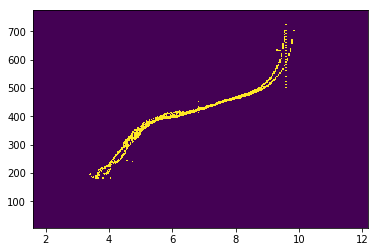

In [9]:
# clusterCLEAN'ing the VIPIRgram --- thx to Bingqian Le

def vertical_len(single_freq_iono, y):
    inc = 0;
    while single_freq_iono[y + inc] > 1 and (y + inc) < len(single_freq_iono):
        inc += 1;
    return inc

def neighbor_len(single_freq_iono, y):
    inc = 0;
    while single_freq_iono[y - inc] > 1 and (y - inc) > 0:
        inc += 1;
    total = inc + vertical_len(single_freq_iono, y)
    if (total > 1):
        total -=1
    return total


def shrink(data_array_1):
    y_dim, x_dim = data_array_1.shape
    data_array = data_array_1.copy()
    for i in range(0, x_dim):
        single_freq_iono = data_array[:, i]
        for j in range(0, y_dim - 2):
            if (single_freq_iono[j] > 1 and single_freq_iono[j + 1] > 1):
                if i != x_dim - 1:
                    neighbor_len_right = neighbor_len(data_array[:, i + 1], j)
                    print(neighbor_len_right)
                    if (neighbor_len_right >= 2):
                        inc = vertical_len(single_freq_iono, j)
                        print(inc)
                        for k in range(j, j + inc):
                            if k != (np.floor((j + j + inc)/2)):
                                print(k)
                                single_freq_iono[k] = 0
                                print(single_freq_iono)
        data_array[:, i] = single_freq_iono
    return data_array

def neighbor_exist(single_freq_iono, y):
    if ((y - 1) > 0 and (single_freq_iono[y] and single_freq_iono[y - 1])) or ((y + 1) < len(single_freq_iono) and (single_freq_iono[y] and single_freq_iono[y + 1])):
        return 1
    return 0



def neighbor_check(data_array_1):
    y_dim, x_dim = data_array_1.shape
    data_array = data_array_1.copy()
    for i in range(1, y_dim - 1):
        for j in range(1, x_dim - 1):
            if not (data_array[i - 1, j - 1] or data_array[i - 1, j] or data_array[i - 1, j + 1] 
                    or data_array[i, j - 1] or data_array[i, j + 1]
                    or data_array[i + 1, j - 1] or data_array[i + 1, j] or data_array[i + 1, j + 1]):
                    data_array[i, j] = 0
    return data_array


def find_min_xy(arr2d):
    # This function finds the minimun x and y coordinates of a cluster
    min_x = np.inf
    min_y = np.inf
    for i in range(0, len(arr2d)):
        if arr2d[i, 0] < min_x:
            min_x = arr2d[i, 0]
        if arr2d[i, 1] < min_y:
            min_y = arr2d[i, 1]
    return min_x, min_y

def find_max_xy(arr2d):
    # This function finds the maximun x and y coordinates of a cluster
    max_x = 0
    max_y = 0
    for i in range(0, len(arr2d)):
        if arr2d[i, 0] > max_x:
            max_x = arr2d[i, 0]
        if arr2d[i, 1] > max_y:
            max_y = arr2d[i, 1]
    return max_x, max_y

def find_max_area(arr2d):
    # This function finds the maximun area using min and max coords.
    return (find_max_xy(arr2d)[0] - find_min_xy(arr2d)[0])*(find_max_xy(arr2d)[1] - find_min_xy(arr2d)[1])


def group_labels(X_image, labels, n_clusters):
    # This function groups every cluster together.
    # Input X_image is a 2d array that are coordinate pairs;
    # Input labels are a 1d array specify the cluster label for each coordinate pairs.
    # Output group is a dictionary that has the format: {label: list of pairs}
    current_label = 0;
    group = {};
    for i in range(0, n_clusters ):
        group[i] = []

    for j in range(0, len(labels)):
        group[labels[j]].append(X_image[j])
    return group

def find_cluster(X_image, labels, n_clusters):
    group = group_labels(X_image, labels, n_clusters)
    group_want = 0
    max_area = 0
    for i in range(0, n_clusters):
        if find_max_area(array(group[i])) > max_area:
            max_area = find_max_area(array(group[i]))
            group_want = i
    return group_want

def coor_pair_to_mesh_array(arr2d):
    max_x, max_y = find_max_xy(arr2d)
    mesh_array = np.zeros(np.array([max_y + 1, max_x + 1]).astype(int))
    for i in range(0, len(arr2d)):
        coord = arr2d[i].astype(int)
        mesh_array[coord[1], coord[0]] = 10
    return mesh_array

def avg_y(arr2d):
    return np.mean(arr2d[:, 1])

def max_num_group_and_len(sub_cluster):
    current_len = 0
    current_group = 0
    for i in range(0, len(sub_cluster)):
        if len(sub_cluster[i]) > current_len:
            current_len = len(sub_cluster[i])
            current_group = i
    return current_group, current_len

def find_nearst_cluster(predicted, sub_cluster_avg):
    modified = abs(np.array(sub_cluster_avg) - predicted)
    compare = np.inf
    ind = -1
    for i in range(0, len(modified)):
        if modified[i] < 40 and modified[i] < compare:
            compare = modified[i]
            ind = i
    if ind == -1:
        return ind
    return ind, sub_cluster_avg[ind]

def vertical_noise_substraction(data):
    #data_new = np.log10(data)
    data_new = data.copy()
    data_new[0:7, :] = 0
    data_new[:, 0:150] = 0
    data_new[:, -30:-1] = 0
    for trial in range(0, 3):
        for j in range(0, len(freqs)):
            single_freq_iono = array(data_new[:,j])
            avg_power = single_freq_iono.sum()*1.0/(len(single_freq_iono))
            noise_sum = 0
            max_power = np.max(single_freq_iono)
            #median_power = np.median(single_freq_iono)
            #'''
            for i in range(0, len(single_freq_iono)):
                if (single_freq_iono[i] < 0.5*max_power):
                    noise_sum += single_freq_iono[i]
            noise = noise_sum/len(single_freq_iono)
            for i in range(0, len(single_freq_iono)):
                if (single_freq_iono[i] - noise < 1):
                    single_freq_iono[i] = 1
                else:
                    single_freq_iono[i] = single_freq_iono[i] - noise

            data_new[:,j] = single_freq_iono*1
    return data_new

# find nnz in an array
def find_nnz(data):
    nnz = 0
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if data[i, j] != 0:
                nnz += 1
    return nnz

def mean_clear(data_after_substraction):
    data_processed = data_after_substraction.copy()
    nnz = find_nnz(data_processed)
    array_mean = np.sum(data_processed)/nnz
    for i in range(data_processed.shape[0]):
        for j in range(data_processed.shape[1]):
            if data_processed[i, j] > array_mean*0.85:
                data_processed[i, j] = 10
            else:
                data_processed[i, j] = 0
    return data_processed

def whole_clean_procedure(data):
    # whole procedure, below this cell is individual step
    iono_num = 0

    data_processed = mean_clear(vertical_noise_substraction(data))
    nnz = find_nnz(data_processed)
    x_image = np.zeros(nnz)
    y_image = np.zeros(nnz)
    ind = 0
    for i in range(data_processed.shape[0]):
        for j in range(data_processed.shape[1]):
            if data_processed[i, j] > 1:
                x_image[ind] = i;
                y_image[ind] = j;
                ind += 1

    X_image = np.concatenate((array([y_image]), array([x_image])))
    X_image = X_image.T

    n_clusters = 75
#     plt.figure(figsize=(20, 10))
    model = AgglomerativeClustering(linkage="single",
                                    connectivity=None,
                                    n_clusters=n_clusters)
    model.fit(X_image)

    group_want = find_cluster(X_image, model.labels_, n_clusters)
    X_image_want = array(group_labels(X_image, model.labels_, n_clusters)[group_want])

    x_group = X_image_want[:, 0]
    y_group = X_image_want[:, 1]

    data_final = np.zeros(data_processed.shape)
    for i in range(0, len(X_image_want)):
        row = int(X_image_want[i, 0]);
        col = int(X_image_want[i, 1]);
        data_final[col, row] = 10

    return data_final

from sklearn.cluster import AgglomerativeClustering
data_final = whole_clean_procedure(ionograms[3,:,:])
pcolormesh(freqs,hts,data_final)

In [10]:
# get VALLEY ISR phase data and set phase model and fp initial guess for the observation time of VIPIRgram

# thx to Lin Le

def getValleyFitting(xvals,z):
    
    vipirLT=sct['start_hour'][0]-5.0+sct['start_minute'][0]/60.0+sct['start_second'][0]*1.0/3600.0
    valleyfile=valleyname[argmin(np.abs(valleytime-vipirLT))] # select valley file matching VIPIRgram
    print(vipirLT,valleyfile)
    #data=load(valleyfile,allow_pickle=True)[()] 
    #coe = data['coeff']
    #nemax = data['nemax']/2.
    #lt = data['localtime']
    #hts=data['hts']
    #phase3 = data['phase56']
    
    # read in phase data, do a fit to get coefficients
    
    data=load(valleyfile,allow_pickle=True)[()]
    power12=data['power12']; power34=data['power34']; power56=data['power56']; power78=data['power78']
    hts=data['hts']*1000
    
    cross_spec = power56 # select the channel to use
    
    phase_cent = angle(np.concatenate([cross_spec[19:32,0:],cross_spec[33:46,0:]],axis=0).mean(0)) # central band
    phase_side = angle(np.concatenate([cross_spec[ 1:14,0:],cross_spec[51:64,0:]],axis=0).mean(0)) # side band

#     phase_cent[phase_cent<0] = phase_cent[phase_cent<0] + 2*np.pi # move everything between 0 to 2pi
#     phase_side[phase_side<0] = phase_side[phase_side<0] + 2*np.pi 
    
    phase_cent = phase_cent - phase_cent[130:138].mean(0)
    phase_side = phase_side - phase_cent[130:138].mean(0)
    
    # Start the unwrap from the phase EEJ
    # 140 is the index for 100km, about the height of EEJ
    for idx in range(140 ,phase_cent.shape[0]): 
        #  choose the unwrap option which smallest difference between previous 5 point
        unwrapc = array([-2*np.pi,0,2*np.pi,4*np.pi])+phase_cent[idx]
        unwraps = array([-2*np.pi,0,2*np.pi,4*np.pi])+phase_side[idx]
        phase_cent[idx] = unwrapc[argmin(abs(unwrapc-phase_cent[idx-5:idx].mean()))]
        phase_side[idx] = unwraps[argmin(abs(unwraps-phase_side[idx-5:idx].mean()))]
    
    h_idx_start = argmin(abs(hts-H_LOW))
    h_idx_end = argmin(abs(hts-H_HIGH))+1  # Fitting from height of H_LOW to H_HIGH
    coe = np.polyfit(hts[h_idx_start:h_idx_end],phase_cent[h_idx_start:h_idx_end],P_ORDER) # P_ORDER is the order of polynomial

    ne = []
    for zz in z:
        r,lon,lat,dec,ha,aspect,B = jro0.aspect_txty(igrf_year,zz,valleytx,valleyty)
        Gyrof = (dot(B,B))**0.5 *1.76e2
        ne += [drhodz(coe,zz*1000)*(3e8*50e6**2)/2.0/80.6/Gyrof/np.abs(cos(aspect))/1e11]
    ne = array(ne)
    
    ne[ne<0]=0
    fp=(8.06*ne)**0.5
    xvals_m=copy(xvals)
    #xvals_m[fp>xvals_m]=fp[fp>xvals_m] 
    xvals_m=fp
    #xvals_m[ne>0] = (8.06*ne[ne>0])**0.5
    
    return phase_cent,hts,xvals_m

# fifth order polynomial fit to Faraday phase data and derivative \propto N
def rho(coe,z):
    y = zeros_like(z)
    order = coe.shape[0]-1
    for n in range(order+1):
        y += coe[-n-1]*(z**n) #coe[-n-1] the last coefficient when order is zero
    return y
def drhodz(coe,z):
    y = zeros_like(z)
    order = coe.shape[0]-1
    for n in range(1,order+1):
        y += coe[-n-1]*n*(z**(n-1)) 
    return y

In [11]:
# C based fast OX mode --- thx to Bingqian and Lin

from ctypes import *
from numpy.ctypeslib import ndpointer
OXmodeC = CDLL('/home/linle2/Faraday_valley7/pythonc/oxmodeinc.so').oxmodeinc

def OXmode_fast(fps,fes,Z):
    
    # Faraday phase forward model
    Nefp = fps**2/8.06 * 1e11*(fps>0).astype(np.int_)
    Phase_sim = [0]
    for i in range(1,Nefp.shape[0]):
        Phase_sim += [Phase_sim[-1] + 2.0*80.6/(3e8*5e7**2)*fes[i]*2*pi*1e6*np.abs(cos(theta[i]))*Nefp[i]*(Z[i]-Z[i-1])*1e3]
    Phase_sim = array(Phase_sim)
    
    # O-trace forward model
    fcO=fps.max(0)                          # critical frequency in O-mode
    fvsO=np.arange(41.,np.ceil(40*fcO)+1,dtype=np.float64)/40.     # setting the frequencies to skim through
    vhsO=zeros_like(fvsO,dtype=np.float64)
    
    # X-trace forward model
    fe0=fes[argmax(fps)] # electron gyro-frequency in MHz
    fcX=(np.sqrt(4*fcO*fcO+fe0+fe0)+fe0)/2        # critical frequency in X-mode
    fvsX=np.arange(41.,np.ceil(40*fcX)+1,dtype=np.float64)/40.     # setting the frequencies to skim through
    vhsX=zeros_like(fvsX,dtype=np.float64)
    
    OXmodeC.argtypes = [c_size_t,
                        c_size_t,
                        c_size_t,
                        ndpointer(c_double, flags="C_CONTIGUOUS"),
                        ndpointer(c_double, flags="C_CONTIGUOUS"),
                        ndpointer(c_double, flags="C_CONTIGUOUS"),
                        c_double,
                        c_double,
                        ndpointer(c_double, flags="C_CONTIGUOUS"),
                        ndpointer(c_double, flags="C_CONTIGUOUS"),
                        ndpointer(c_double, flags="C_CONTIGUOUS"),
                        ndpointer(c_double, flags="C_CONTIGUOUS")]
    OXmodeC(np.int_(Z.shape[0]), 
            np.int_(fvsO.shape[0]),
            np.int_(fvsX.shape[0]),
            fps.astype(np.float64),
            Z.astype(np.float64),
            fes,
            np.float64(fcO),
            np.float64(fcX),
            fvsO,
            vhsO,
            fvsX,
            vhsX)     
    return fvsO,vhsO,fvsX,vhsX,Phase_sim

(15.726944444444445, '/raid/home/linle2/16_Valley_spectra/valley7/spectra_d2016014/proc2/D2016014405o0.npy')


/home/bye3/.local/lib/python2.7/site-packages/radarpack/radarbeam.py:717: RuntimeWarning: invalid value encountered in true_divide
  vec = vec/np.sqrt(np.dot(vec,vec))
/home/bye3/.local/lib/python2.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


bye & have fun with canvas


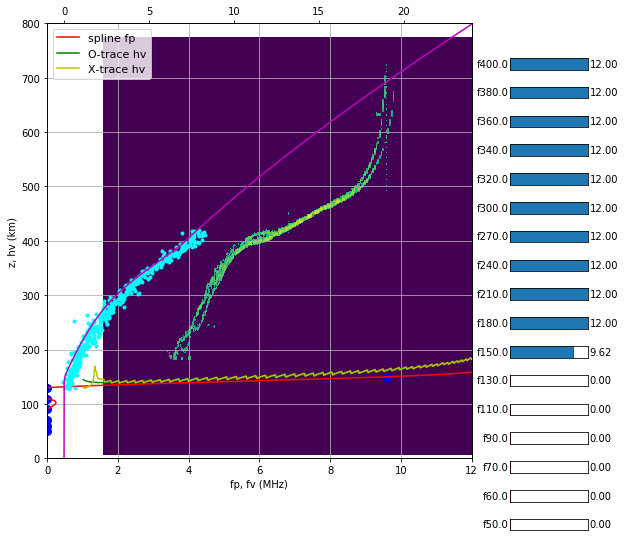

In [12]:
# placing VIPIR, VALLEY ISR, and model curves together 
# Erhan + Pablo for VIPIR O- and X-traace models, Erhan + Lin Le for ISR phase

#from ipywidgets import interact, interactive, fixed, interact_manual
#import ipywidgets as widgets
#from IPython.display import display

from matplotlib.widgets import Slider
from matplotlib import pyplot as plt
from matplotlib import rcParams
import scipy.interpolate as inter
import numpy as np
import datetime
import scipy.constants as const
import scipy.signal as ss

#from isrpy.beampack.jrobeam0 import aspect_txty

cache_fe = dict()

data_final = whole_clean_procedure(ionograms[3,:,:])

# dt0 = datetime.datetime(2015,4,15)
dt0 = datetime.datetime(sct['start_year'][0],sct['start_month'][0],sct['start_day'][0])
igrf_year = dt0.year + (dt0-datetime.datetime(dt0.year,1,1)).total_seconds() / (
        datetime.datetime(dt0.year+1,1,1)-datetime.datetime(dt0.year,1,1)).total_seconds()

dz=0.5 # resolution in km --- 0.1 is for good resolution, 0.5 for speed

#fp=lambda z: np.maximum(np.maximum(np.maximum(8.2*(1-(z-400)**2/200**2),4.1*(1-(z-160)**2/80**2)),
#    2.1*(1-(z-100)**2/30**2)),0) # some initial plasma frequency profile, triple parabolic

#get a list of points to fit a spline
#N = 17
#zmin = 0
#zmax = 800
#z = np.linspace(zmin,zmax,N)

zmin = 0
zmax = 800
anchors=array([[50,0],[60,0.33],[70,1.00],[90,2.0],[110,2.7],
               [130,3.6],[150,4.67],[180,5.22],[210,5.89],[240,7.11],[270,7.11],
               [300,7.11],[320,7.11],[340,7.11],[360,7.11],[380,7.11],[400,7.11]])
z=anchors[:,0]
xvals=anchors[:,1] # in terms of plasma frequency       
N=shape(anchors)[0]
xvals[6:]=0 # we will use plasma frequencies from ISR phase fit in these range
phase,valley_z,xvals_m=getValleyFitting(xvals,z) # bring in ISR phase data & change anchors
xvals=xvals_m # modified plasma frequency anchors

#spline fit
spline=inter.InterpolatedUnivariateSpline(z,xvals,ext=3)

#figure.subplot.right
rcParams['figure.subplot.right'] = 0.78
#set up a plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

# height grid
Z = np.arange(0,zmax+1,dz)
fes = []
theta = []
for zz in Z:
    r,lon,lat,dec,ha,aspect,B = jro0.aspect_txty(igrf_year,zz,valleytx,valleyty)
    fes += [(dot(B,B))**0.5 *1.76e2]
    theta += [aspect]
fes = array(fes,dtype=np.float64) /1e6/2/np.pi
theta = array(theta)    

#fps=fp(Z)
fps=spline(Z)
#ax1.plot (fp(Z),Z, 'k--', label='original')

ax1.pcolormesh(freqs,hts,data_final*log10(ionograms[3,:,:])) # cleaned ionogram plot
# ax1.pcolormesh(freqs,hts,data_final)

l, = ax1.plot (xvals,z,color='b',linestyle='none',marker='o',markersize=8) # forward model fp anchors
m, = ax1.plot (spline(Z), Z, 'r-', label='spline fp') # forward model fp spline plot

fvsO,vhsO,fvsX,vhsX,Phase_sim=OXmode_fast(fps,fes,Z) # forward model O- and X-traces computed
mO, = ax1.plot (fvsO, vhsO, 'g-', label='O-trace hv') # O-trace plot
mX, = ax1.plot (fvsX, vhsX, 'y-', label='X-trace hv') # X-trace plot

ax2 = ax1.twiny()
ax2.scatter (phase[170:],valley_z[170:]/1000,color='cyan',marker='.', label='Phase') # phase data plot
ax2.set_xlim([-1,24])
PS, = ax2.plot (Phase_sim,Z,'m-',label=r'\phi_re') # forward model phase fit

def update(val):
    # update curve
    for i in np.arange(N):
        xvals[i] = sliders[i].val
    l.set_xdata(xvals)
    print xvals
    spline = inter.InterpolatedUnivariateSpline (z,xvals,ext=3)
    fps=spline(Z)
    m.set_xdata(fps)
    fvsO,vhsO,fvsX,vhsX,Phase_sim=OXmode_fast(fps,fes,Z)
    mO.set_xdata(fvsO)
    mO.set_ydata(vhsO)
    mX.set_xdata(fvsX)
    mX.set_ydata(vhsX)
    
    PS.set_xdata(Phase_sim)
    
    fig.canvas.draw_idle()

ax1.set_yscale('linear')
ax1.set_xlim(0,12)
ax1.set_ylim(0,zmax)
ax1.set_xlabel('fp, fv (MHz)')
ax1.set_ylabel('z, hv (km)')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=2,prop={'size':11})

sliders = []
for i in np.arange(N):
    j=N-1-i
    axamp=plt.axes([0.84, 0.8-(j*0.05), 0.12, 0.02])
    # Slider
    s = Slider(axamp,'f{0}'.format(z[i]),0,12,valinit=xvals[i])
    sliders.append(s)
for i in np.arange(N):
    #samp.on_changed(update_slider)
    sliders[i].on_changed(update)
fig.show()
print "bye & have fun with canvas"

In [10]:

def OXmode(fps,Z):
    # O-trace forward model
    fcO=fps.max(0)                          # critical frequency in O-mode
    fvsO=np.arange(41.,np.ceil(40*fcO)+1)/40.     # setting the frequencies to skim through

    vhsO=[] #virtual height array initiated
    for fv in fvsO: # for all ionosonde frequencies
        if fv<fcO+0.025:
            vh=0
            n2b=1
            for fp,z in zip(fps,Z): # for all heights until reflection height
                X=(fp/fv)**2
                n2t=1-X
#                if n2t>0:
                if n2t>0:
                    #vh=vh+dz/((np.sqrt(n2b)+np.sqrt(n2t))/2.)
                    prev_dh = dz*((1/np.sqrt(n2b)+1/np.sqrt(n2t))/2.) # keep track of latest dh
                    prevn2b = n2b                                     # keep track of latest nb2
                    vh=vh+prev_dh
                    n2b=n2t
                else:
                    #vh=vh+2.*2*dz*np.sqrt(n2b)/(n2b-n2t)
                    # substract last dh and add last slab made of two slabs:
                    vh=vh - prev_dh + 2.*(2*dz)*np.sqrt(prevn2b)/(prevn2b-n2t) 
                    break
            vhsO=vhsO+[vh] #virtual height array is built
        else:
            break
    # X-trace forward model
    fe0=4.4/2/np.pi # electron gyro-frequency in MHz
    fcX=(np.sqrt(4*fcO*fcO+fe0+fe0)+fe0)/2        # critical frequency in X-mode
    fvsX=np.arange(41.,np.ceil(40*fcX)+1)/40.     # setting the frequencies to skim through

    vhsX=[] #virtual height array initiated
    for fv in fvsX: # for all ionosonde frequencies
        if fv<fcX+0.025:
            vh=0
            n2b=1
            fxb=1
            for fp,z in zip(fps,Z): # for all heights until reflection height
                if z not in cache_fe.keys():
                    r,geoc_lat,lon,aspect,B = jro0.aspect_angle(igrf_year,jro0.xyz0 + jro0.zenith0 * z)
                    fe = const.e * np.linalg.norm(B) * 1e-9 / const.m_e /1e6 /2/np.pi #MHz
                    cache_fe[z] = fe # saving for speed 
                else:
                    fe = cache_fe[z]
                X=(fp/fv)**2
                Y=fe/fv
                n2t=1-X*(1-X)/(1-X-Y**2)
                fxt=n2t+X*((1-X)/(1-X-Y**2))**2+(X*Y/(1-X-Y**2))**2
                if n2t>0:
                    prev_dh = dz/((np.sqrt(n2b)/fxb+np.sqrt(n2t)/fxt)/2.) # keep track of latest dh
                    prevn2b = n2b                                     # keep track of latest nb2
                    vh=vh + prev_dh
                    n2b=n2t
                    fxb=fxt
                else:
                    #vh=vh+2.*dz*np.sqrt(n2b)/(n2b-n2t)*(2-Y)/(1-Y)
                    # substract last dh and add last slab made of two slabs:
                    vh=vh - prev_dh + 2.*(2*dz)*np.sqrt(prevn2b)/(prevn2b-n2t)*(2-Y)/(1-Y)
                    break
            vhsX=vhsX+[vh] #virtual height array is built
        else:
            break
    
    # Faraday phase forward model
    Nefp = fps**2/8.06 * 1e11*(fps>0).astype(np.int_)
    Phase_sim = zeros_like(Nefp)
    for i in range(1,Nefp.shape[0]):
        r,lon,lat,dec,ha,aspect,B = aspect_txty(igrf_year,Z[i],valleytx,valleyty)
        Gyrof = (dot(B,B))**0.5 *1.76e2
        Phase_sim[i] = Phase_sim[i-1] + 2.0*80.6/(3e8*5e7**2)*Gyrof*np.abs(cos(aspect))*Nefp[i]*(Z[i]-Z[i-1])*1e3
            
    return fvsO,vhsO,fvsX,vhsX,Phase_sim
